In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("iris")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species']= encoder.fit_transform(df['species'])

In [7]:
df = df[df['species']!=0][['sepal_width','petal_length','species']]

In [27]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [29]:
df_train

,sepal_width,petal_length,species
50,3.2,4.7,1
96,2.9,4.2,1
80,2.4,3.8,1
101,2.7,5.1,2
111,2.7,5.3,2
114,2.8,5.1,2
148,3.4,5.4,2
126,2.8,4.8,2
63,2.9,4.7,1
110,3.2,5.1,2


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

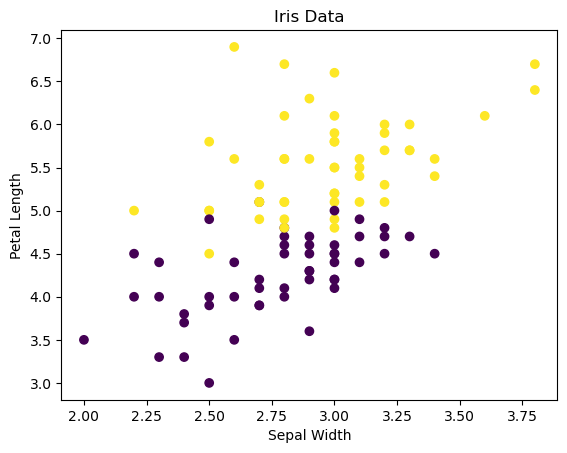

In [10]:
plt.scatter(x=df['sepal_width'],y=df['petal_length'], c=df['species'])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.title('Iris Data')
plt.show()

In [12]:
X_test = df_test.iloc[:,0:2].values
y_test = df_test.iloc[:,-1].values

# Bagging

# Boot straping

In [15]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,-1].values

In [16]:
df_bag

,sepal_width,petal_length,species
133,2.8,5.1,2
101,2.7,5.1,2
133,2.8,5.1,2
77,3.0,5.0,1
145,3.0,5.2,2
77,3.0,5.0,1
86,3.1,4.7,1
76,2.8,4.8,1


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [19]:
dt_bag1 = DecisionTreeClassifier()
#low bias high variance with unlimited depth bnega

In [24]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf,filled=True)
    plt.show()
    plot_decision_regions(X,y, clf=clf, legend=2)
    plt.show()
    y_pred = clf.predict(X_test)
    print(y_pred)
    print(accuracy_score(y_test, y_pred))

In [22]:
# getting a decision tree , training on input and output, plot the tree, plot decision region , print accuracy score

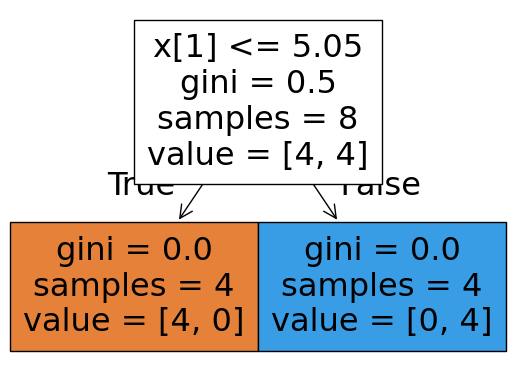

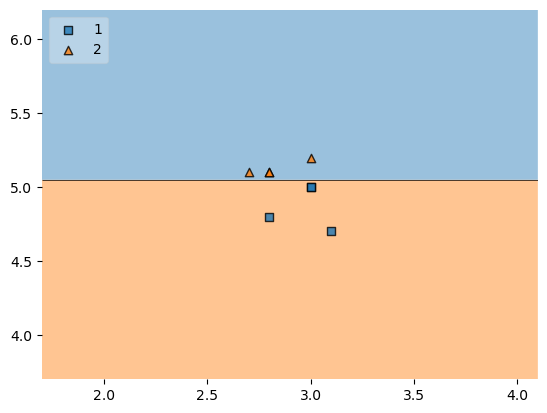

[1 2 1 2 1]
0.8


In [30]:
evaluate(dt_bag1,X,y)

In [33]:
df_bag = df_train.sample(8, replace=True)
X= df_bag.iloc[:,0:2].values
y= df_bag.iloc[:,-1].values
df_bag

,sepal_width,petal_length,species
101,2.7,5.1,2
63,2.9,4.7,1
63,2.9,4.7,1
148,3.4,5.4,2
50,3.2,4.7,1
101,2.7,5.1,2
96,2.9,4.2,1
114,2.8,5.1,2


In [38]:
dt_bag2 = DecisionTreeClassifier()

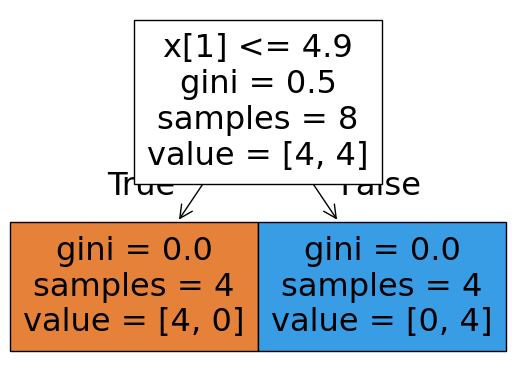

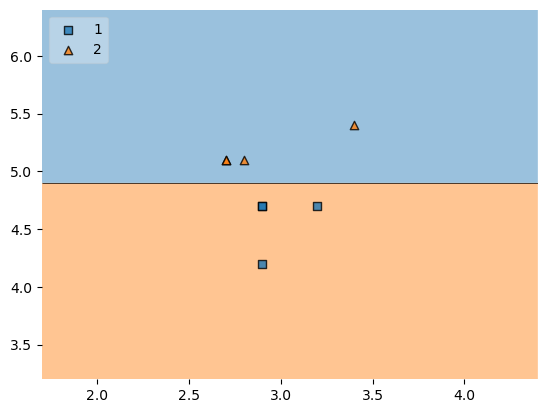

[1 2 1 2 1]
0.8


In [40]:
evaluate(dt_bag2,X,y)

In [42]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,-1].values
df_bag

,sepal_width,petal_length,species
111,2.7,5.3,2
110,3.2,5.1,2
63,2.9,4.7,1
96,2.9,4.2,1
96,2.9,4.2,1
148,3.4,5.4,2
148,3.4,5.4,2
63,2.9,4.7,1


In [43]:
dt_bag3 = DecisionTreeClassifier()

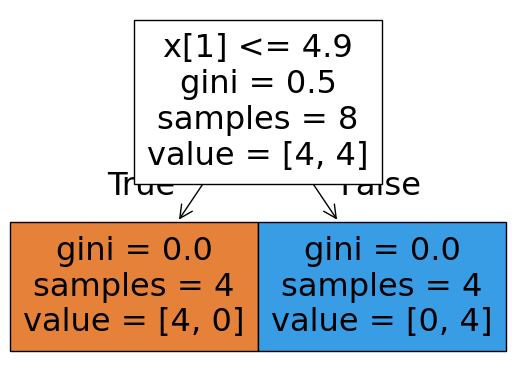

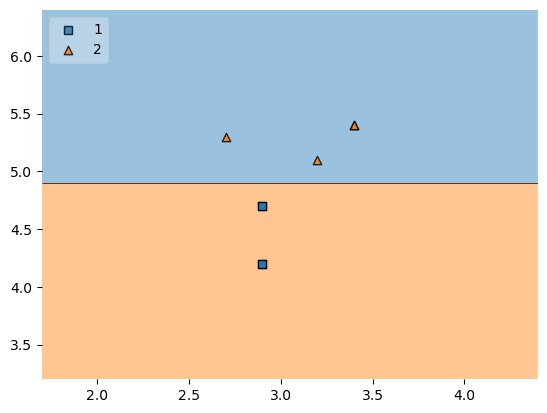

[1 2 1 2 1]
0.8


In [44]:
evaluate(dt_bag3,X,y)

# Aggregation

In [45]:
df_test

,sepal_width,petal_length,species
103,2.9,5.6,2
91,3.0,4.6,1
54,2.8,4.6,1
99,2.8,4.1,1
104,3.0,5.8,2


In [46]:
print('answer1',dt_bag1.predict(np.array([3.0,4.2]).reshape(1,2)))
print('answer2',dt_bag2.predict(np.array([3.0,4.2]).reshape(1,2)))
print('answer3',dt_bag3.predict(np.array([3.0,4.2]).reshape(1,2)))

answer1 [1]
answer2 [1]
answer3 [1]


In [47]:
#1.pasting: row sampling but without replacement
#2.random subspace: with or without replacement
#3. random patches :

In [48]:
df.sample(2,replace=True,axis=1)

,species,species
101,2,2
124,2,2
86,1,1
63,1,1
140,2,2
...,...,...
82,1,1
116,2,2
146,2,2
91,1,1


In [49]:
df.sample(8,replace=True,axis=0).sample(2,replace=True,axis=1)

,species,sepal_width
124,2,3.3
132,2,2.8
91,1,3.0
111,2,2.7
75,1,3.0
88,1,3.0
64,1,2.9
100,2,3.3
